In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers

In [2]:
from tensorflow.keras.datasets import mnist
import numpy 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [5]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [6]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [7]:
train_images[0].shape

(28, 28, 1)

In [8]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomFlip(),
    layers.RandomZoom(0.1), 
    layers.RandomTranslation(0.1, 0.1)
])

In [9]:
def create_model():
    inputs = keras.Input(shape=(28,28,1))
    x = data_augmentation(inputs)

    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)


    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)

    residual = x
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.add([x,residual])

    
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)

    model =keras.Model(inputs, outputs)
    return model    

    


    

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]

In [12]:
model = create_model()

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, callbacks=callbacks, epochs=15, batch_size = 8, validation_data=(test_images, test_labels))

Epoch 1/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 102s 14ms/step - accuracy: 0.8811 - loss: 0.3589 - val_accuracy: 0.9455 - val_loss: 0.1687
Epoch 2/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 104s 14ms/step - accuracy: 0.9009 - loss: 0.3031 - val_accuracy: 0.9461 - val_loss: 0.1660
Epoch 3/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 101s 13ms/step - accuracy: 0.9098 - loss: 0.2776 - val_accuracy: 0.9481 - val_loss: 0.1580
Epoch 4/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 91s 12ms/step - accuracy: 0.9141 - loss: 0.2591 - val_accuracy: 0.9474 - val_loss: 0.1674
Epoch 5/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 104s 14ms/step - accuracy: 0.9197 - loss: 0.2468 - val_accuracy: 0.9569 - val_loss: 0.1256
Epoch 6/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 116s 15ms/step - accuracy: 0.9231 - loss: 0.2350 - val_accuracy: 0.9546 - val_loss: 0.1446
Epoch 7/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 111s 15ms/step - accuracy: 0.9254 - loss: 0.2294 - val_accuracy: 0.9582 - val_loss: 0.1312
Epoch 8/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 111s 15ms/step - accuracy: 0

In [19]:
import joblib
joblib.dump(model, 'model.pkl', compress=1)
vector_load = joblib.load('model.pkl')

In [20]:
from sklearn.metrics import classification_report

In [21]:
import pprint

In [22]:
y_pred = model.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [23]:
pprint.pprint(classification_report(test_labels, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      0.99      0.99       980\n'
 '           1       1.00      0.97      0.98      1135\n'
 '           2       0.93      0.96      0.94      1032\n'
 '           3       0.98      1.00      0.99      1010\n'
 '           4       0.99      0.99      0.99       982\n'
 '           5       0.96      0.94      0.95       892\n'
 '           6       0.96      0.93      0.94       958\n'
 '           7       0.94      0.98      0.96      1028\n'
 '           8       0.99      0.99      0.99       974\n'
 '           9       0.97      0.95      0.96      1009\n'
 '\n'
 '    accuracy                           0.97     10000\n'
 '   macro avg       0.97      0.97      0.97     10000\n'
 'weighted avg       0.97      0.97      0.97     10000\n')


In [24]:
import seaborn as sns

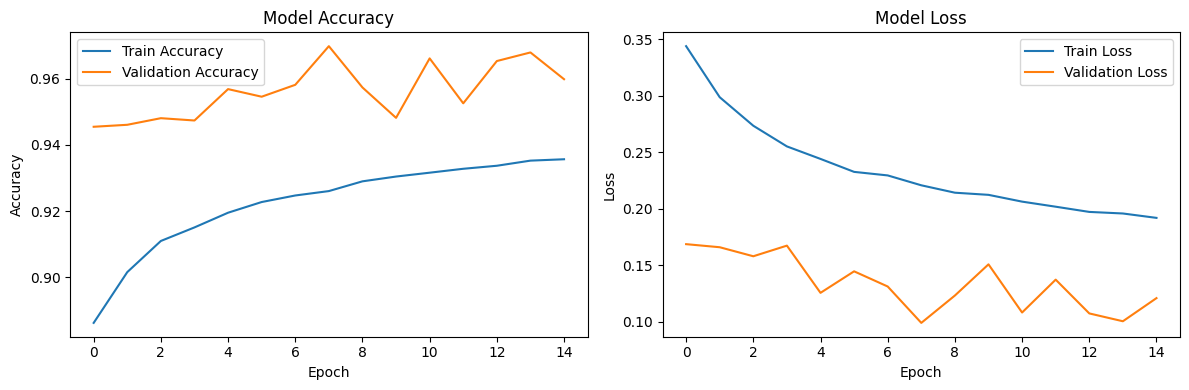

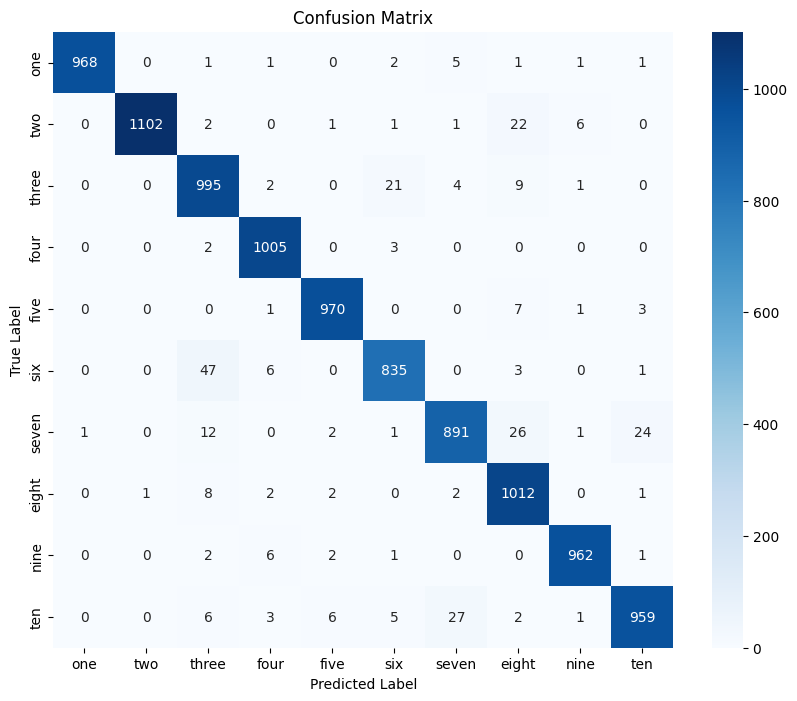

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = tf.math.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Make predictions and plot confusion matrix
class_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
plot_confusion_matrix(test_labels, y_pred, class_names)

In [26]:
import numpy as np
from PIL import Image
import tensorflow as tf

def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert to grayscale if it's not already
    if img.mode != 'L':
        img = img.convert('L')
    
    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0
    
    # Reshape to (1, 28, 28, 1) for model input
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

In [27]:
def predict_class(model, image_array):
    # Make prediction
    prediction = model.predict(image_array)
    # Get the class with highest probability
    class_index = np.argmax(prediction)
    # Define class names
    class_names = ['one', 'two', 'three', 'four', 'five', 
                   'six', 'seven', 'eight', 'nine', 'ten']

    print(len(class_names))
    
    # Get the predicted class name
    predicted_class = class_names[class_index]
    
    # Get the confidence (probability)
    confidence = prediction[0][class_index]
    
    return predicted_class, confidence

In [ ]:
# A Trained Model named 'model.pkl' can be used for testcases
# Replace 'path_to_your_image.jpg' with the actual path to your image
image_path = 'path_to_your_image.jpg'

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the class
predicted_class, confidence = predict_class(model, processed_image)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")